# Perceptron Learning with MSE

Non-probabilistic (distribution-free) system

Report required performance measures

• F1-score 
• Accuracy

## Import necessary library

In [8]:
import numpy as np
import random as rm
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Get data from previous cvs file

In [17]:
def getData(fname1, fname2):
    df_train = pd.read_csv(fname1)
    df_test = pd.read_csv(fname2)
    data_train = np.array(df_train)
    data_test = np.array(df_test)
    xdata_train = data_train[:,:len(data_train[0]) - 1]
    ydata_train = data_train[:, -1]
    xdata_test = data_test[:,:len(data_test[0]) - 1]
    ydata_test = data_test[:, -1]
    
    return xdata_train, ydata_train, xdata_test, ydata_test
    
xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select = getData("mushroom_train_select.csv", "mushroom_test_select.csv")

print(f"The shape of training xdata shape is", xdata_train_select.shape)
print(f"The shape of training ydata shape is", ydata_train_select.shape)
print(f"The shape of testing xdata shape is", xdata_test_select.shape)
print(f"The shape of testing ydata shape is", ydata_test_select.shape)

The shape of training xdata shape is (42748, 32)
The shape of training ydata shape is (42748,)
The shape of testing xdata shape is (18321, 32)
The shape of testing ydata shape is (18321,)


Fold 1, train data points: 32061, validation data points: 10687
Fold 2, train data points: 32061, validation data points: 10687
Fold 3, train data points: 32061, validation data points: 10687
Fold 4, train data points: 32061, validation data points: 10687
When epoch = 0:
The mean of training loss = 0.41245594335797386, the mean of validation loss = 0.41569196219706184
The mean of training accuracy = 0.5875440566420261, the mean of validation accuracy = 0.5843080378029382
The mean of F1 Score for the system = 0.5980920193424242
Fold 1, train data points: 32061, validation data points: 10687
Fold 2, train data points: 32061, validation data points: 10687
Fold 3, train data points: 32061, validation data points: 10687
Fold 4, train data points: 32061, validation data points: 10687
When epoch = 1:
The mean of training loss = 0.3786999781666199, the mean of validation loss = 0.38046224384766536
The mean of training accuracy = 0.6213000218333802, the mean of validation accuracy = 0.619537756

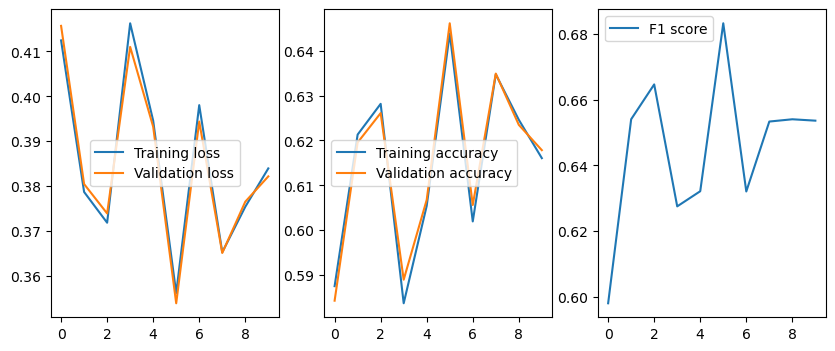

In [32]:
def Perceptron_experiment(xdata_train_select, ydata_train_select): 
    xdata_train = np.copy(xdata_train_select)
    ydata_train = np.copy(ydata_train_select)
    
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    f1_score_history = []
    
    # Normalize dataset
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)
    
#     for degree in range(1,8):
    epochs_num = 10
    for epoch in range(epochs_num):
        MSE_train = 0.
        MSE_val = 0.
        acc_train = 0.
        acc_val = 0.
        score = 0.
        
        # Define the cross-validation object
        cv = KFold(n_splits=4, shuffle=True)
        for i, (train_index, val_index) in enumerate(cv.split(xdata_train)): # i in range of 4
            
            D_train_xdata = xdata_train[train_index]
            D_train_ydata = ydata_train[train_index]
            D_val_xdata = xdata_train[val_index]
            D_val_ydata = ydata_train[val_index]
        
            N_train = len(D_train_ydata)
            N_val = len(D_val_ydata)
            print("Fold {}, train data points: {}, validation data points: {}".format(i+1, len(D_train_xdata), len(D_val_xdata)))

            reg = Perceptron(tol=1e-3).fit(D_train_xdata, D_train_ydata)
        
            predict_train = reg.predict(D_train_xdata) 
            predict_val = reg.predict(D_val_xdata) 
            
            # Caluculate the mean squared error for training and validation data
            MSE_train += mean_squared_error(predict_train, D_train_ydata)
            MSE_val += mean_squared_error(predict_val, D_val_ydata)
            
            acc_train += np.sum(predict_train == D_train_ydata) / N_train
            acc_val += np.sum(predict_val == D_val_ydata) / N_val
            
            score += f1_score(predict_val, D_val_ydata)
            
        train_loss_history.append(MSE_train / 4)
        val_loss_history.append(MSE_val / 4)
        train_acc_history.append(acc_train / 4)
        val_acc_history.append(acc_val / 4)
        f1_score_history.append(score / 4)
        
        print(f"When epoch = {epoch}:")
        print(f"The mean of training loss = {MSE_train / 4}, the mean of validation loss = {MSE_val / 4}")        
        print(f"The mean of training accuracy = {acc_train / 4}, the mean of validation accuracy = {acc_val / 4}")
        print(f"The mean of F1 Score for the system = {score / 4}")
        
    # Plot the learning curve
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
    
    ax1.plot(np.arange(epochs_num), train_loss_history, label = "Training loss")
    ax1.plot(np.arange(epochs_num), val_loss_history, label = "Validation loss")
    ax1.legend()

    ax2.plot(np.arange(epochs_num), train_acc_history, label = "Training accuracy")
    ax2.plot(np.arange(epochs_num), val_acc_history, label = "Validation accuracy")
    ax2.legend()
    
    ax3.plot(np.arange(epochs_num), f1_score_history, label = "F1 score")
    ax3.legend()
    
        
Perceptron_experiment(xdata_train_select, ydata_train_select)


According to the validation accurcay, this model using perceptron and MSE performs much better than the baseline system which has 55% accuracy. But there is still some space for us to improve this model. For example, we may convert the features to polynomial and apply the data after convert to the perceptron learning.

Although we already reduced the number of features, it is a large amount which will take a lot of time to convert to polynomial. Therefore, we should do the features selection again to avoid this situation.

In [21]:
def Perceptron_polynomial_experiment(xdata_train_select, ydata_train_select, k, max_degree): 
    xdata_train = np.copy(xdata_train_select)
    ydata_train = np.copy(ydata_train_select)
    
    # Reduce the feature numbers to k
    fs = SelectKBest(score_func=f_classif, k=k)
    
    # Apply feature selection
    xdata_train = fs.fit_transform(xdata_train, ydata_train)
    
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    f1_score_history = []
    
    # Normalize dataset
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)
    
    for degree in range(1, max_degree):
        MSE_train = 0.
        MSE_val = 0.
        acc_train = 0.
        acc_val = 0.
        score = 0.
        
        # Define the cross-validation object
        cv = KFold(n_splits=4, shuffle=True)
        for i, (train_index, val_index) in enumerate(cv.split(xdata_train)): # i in range of 4
            
            D_train_xdata = xdata_train[train_index]
            D_train_ydata = ydata_train[train_index]
            D_val_xdata = xdata_train[val_index]
            D_val_ydata = ydata_train[val_index]
        
            N_train = len(D_train_ydata)
            N_val = len(D_val_ydata)
            
            # Transfer the features to polynomial
            poly = PolynomialFeatures(degree)
            xdata_poly_train = poly.fit_transform(D_train_xdata) 
            xdata_poly_val = poly.transform(D_val_xdata)

            reg = Perceptron(tol=1e-3).fit(xdata_poly_train, D_train_ydata)
            
            predict_train = reg.predict(xdata_poly_train) 
            predict_val = reg.predict(xdata_poly_val) 
            
            # Caluculate the mean squared error for training and validation data
            MSE_train += mean_squared_error(predict_train, D_train_ydata)
            MSE_val += mean_squared_error(predict_val, D_val_ydata)
            
            acc_train += np.sum(predict_train == D_train_ydata) / N_train
            acc_val += np.sum(predict_val == D_val_ydata) / N_val
            
            score += f1_score(predict_val, D_val_ydata)
        
        train_loss_history.append(MSE_train / 4)
        val_loss_history.append(MSE_val / 4)
        train_acc_history.append(acc_train / 4)
        val_acc_history.append(acc_val / 4)
        f1_score_history.append(score / 4)
        
        
#         print(f"When epoch = {epoch}:")
        print(f"When degree = {degree}:")
        print(f"The mean of training loss = {MSE_train / 4}, the mean of validation loss = {MSE_val / 4}")        
        print(f"The mean of training accuracy = {acc_train / 4}, the mean of validation accuracy = {acc_val / 4}")
        print(f"The mean of F1 Score for the system = {score / 4}")
        
#         print(train_loss_history)
    # Plot the learning curve
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
    
    ax1.plot(np.arange(len(train_loss_history)), train_loss_history, label = "Training loss")
    ax1.plot(np.arange(len(val_loss_history)), val_loss_history, label = "Validation loss")
    ax1.legend()

    ax2.plot(np.arange(len(train_acc_history)), train_acc_history, label = "Training accuracy")
    ax2.plot(np.arange(len(val_acc_history)), val_acc_history, label = "Validation accuracy")
    ax2.legend()
    
    ax3.plot(np.arange(len(f1_score_history)), f1_score_history, label = "F1 score")
    ax3.legend()

### K = 5
When we reduce the feature numbers to 5, the accuracy of validation is lower than the experiment 1.

When degree = 1:
The mean of training loss = 0.37370949128224323, the mean of validation loss = 0.3711284738467297
The mean of training accuracy = 0.6262905087177568, the mean of validation accuracy = 0.6288715261532704
The mean of F1 Score for the system = 0.6741979983954344
When degree = 2:
The mean of training loss = 0.44276535354480523, the mean of validation loss = 0.4477402451576682
The mean of training accuracy = 0.5572346464551947, the mean of validation accuracy = 0.5522597548423318
The mean of F1 Score for the system = 0.5440032285367746
When degree = 3:
The mean of training loss = 0.3966969214934032, the mean of validation loss = 0.3971647796388135
The mean of training accuracy = 0.6033030785065968, the mean of validation accuracy = 0.6028352203611864
The mean of F1 Score for the system = 0.6847049343313859
When degree = 4:
The mean of training loss = 0.4067870621627523, the mean of validation loss = 0.4059605127725273
The mean of training accuracy = 0.5932129378372477, the 

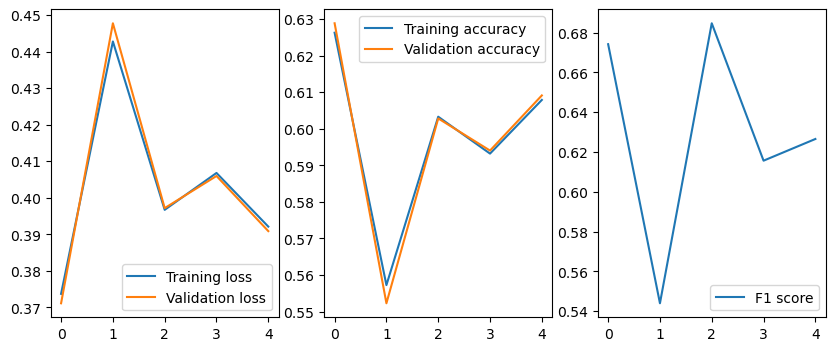

In [22]:
Perceptron_polynomial_experiment(xdata_train_select, ydata_train_select, 5, 6)

### K = 10
When we reduce the feature numbers to 10, the accuracy of validation while degree = 10 is better than experiment 1.

When degree = 1:
The mean of training loss = 0.38907863135897197, the mean of validation loss = 0.38778422382333677
The mean of training accuracy = 0.610921368641028, the mean of validation accuracy = 0.6122157761766633
The mean of F1 Score for the system = 0.6489957087070615
When degree = 2:
The mean of training loss = 0.4054536664483329, the mean of validation loss = 0.40067371572939087
The mean of training accuracy = 0.5945463335516671, the mean of validation accuracy = 0.5993262842706092
The mean of F1 Score for the system = 0.6655028824989377
When degree = 3:
The mean of training loss = 0.3307601135335766, the mean of validation loss = 0.33082249461963137
The mean of training accuracy = 0.6692398864664234, the mean of validation accuracy = 0.6691775053803687
The mean of F1 Score for the system = 0.7258243133510512
When degree = 4:
The mean of training loss = 0.2657122360500296, the mean of validation loss = 0.2664452138111724
The mean of training accuracy = 0.7342877639499704, the

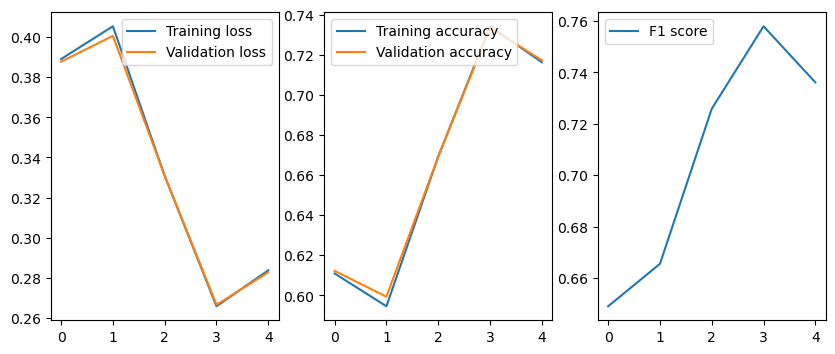

In [23]:
Perceptron_polynomial_experiment(xdata_train_select, ydata_train_select, 10, 6)

### K = 15
When we reduce the feature numbers to 15, the average accuracy of validation is better than the experiment 1 and the highest accuracy = 85%.

When degree = 1:
The mean of training loss = 0.4571285986089018, the mean of validation loss = 0.45805651726396557
The mean of training accuracy = 0.5428714013910982, the mean of validation accuracy = 0.5419434827360344
The mean of F1 Score for the system = 0.5106525581390742
When degree = 2:
The mean of training loss = 0.31900127881226414, the mean of validation loss = 0.3239917656966408
The mean of training accuracy = 0.6809987211877359, the mean of validation accuracy = 0.6760082343033593
The mean of F1 Score for the system = 0.7200538515082855
When degree = 3:
The mean of training loss = 0.23431115685724088, the mean of validation loss = 0.23799943857022549
The mean of training accuracy = 0.7656888431427592, the mean of validation accuracy = 0.7620005614297745
The mean of F1 Score for the system = 0.7870844960109624
When degree = 4:
The mean of training loss = 0.18078818502230123, the mean of validation loss = 0.18475718162253207
The mean of training accuracy = 0.8192118149776987, 

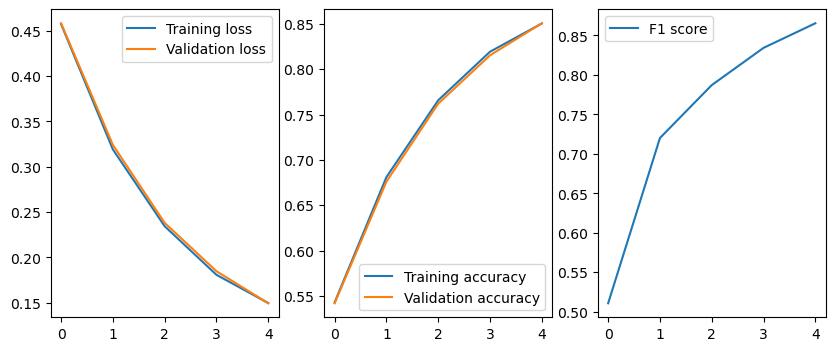

In [24]:
Perceptron_polynomial_experiment(xdata_train_select, ydata_train_select, 15, 6)

When we try to reduce the features number to 15 and the max degree = 5, the program takes nearly 10 minutes to finish the regression.

According to the preivious result, I decide to reduce the max degree while remaining and increasing the feature numbers to check the performance of model.

When degree = 1:
The mean of training loss = 0.46980755434952115, the mean of validation loss = 0.46893421914475536
The mean of training accuracy = 0.5301924456504787, the mean of validation accuracy = 0.5310657808552447
The mean of F1 Score for the system = 0.5101443400003552
When degree = 2:
The mean of training loss = 0.3364913758148529, the mean of validation loss = 0.33877608309160656
The mean of training accuracy = 0.6635086241851471, the mean of validation accuracy = 0.6612239169083933
The mean of F1 Score for the system = 0.6789924272717722
When degree = 3:
The mean of training loss = 0.2270515579676242, the mean of validation loss = 0.22705155796762422
The mean of training accuracy = 0.7729484420323758, the mean of validation accuracy = 0.7729484420323757
The mean of F1 Score for the system = 0.793080295411799
When degree = 4:
The mean of training loss = 0.16070927294844203, the mean of validation loss = 0.16215963319921398
The mean of training accuracy = 0.839290727051558, th

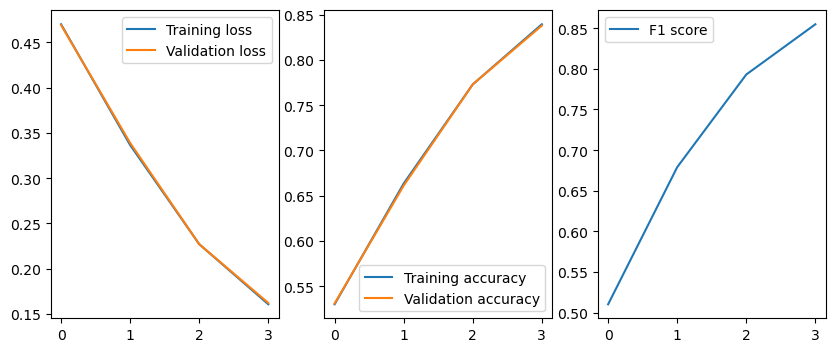

In [25]:
Perceptron_polynomial_experiment(xdata_train_select, ydata_train_select, 15, 5)

When degree = 1:
The mean of training loss = 0.41125510745142074, the mean of validation loss = 0.41073266585571255
The mean of training accuracy = 0.5887448925485792, the mean of validation accuracy = 0.5892673341442874
The mean of F1 Score for the system = 0.6212335895068034
When degree = 2:
The mean of training loss = 0.2505068463241945, the mean of validation loss = 0.2492514269673435
The mean of training accuracy = 0.7494931536758055, the mean of validation accuracy = 0.7507485730326565
The mean of F1 Score for the system = 0.7642163032583458
When degree = 3:
The mean of training loss = 0.10140045538192821, the mean of validation loss = 0.10164218209039019
The mean of training accuracy = 0.8985995446180718, the mean of validation accuracy = 0.8983578179096099
The mean of F1 Score for the system = 0.9053103219346219
When degree = 4:
The mean of training loss = 0.06426811390786315, the mean of validation loss = 0.06655282118461682
The mean of training accuracy = 0.9357318860921369, 

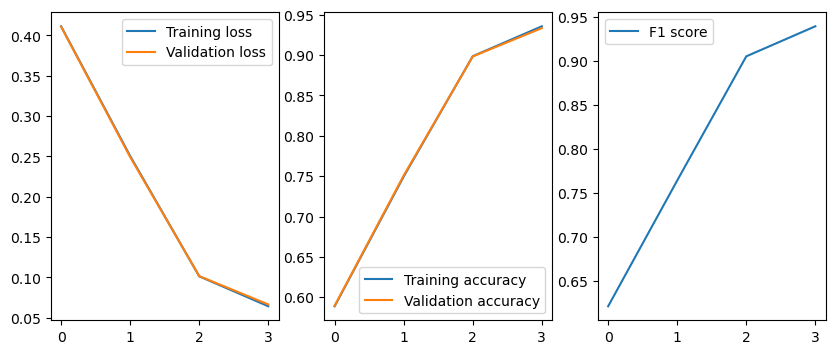

In [26]:
Perceptron_polynomial_experiment(xdata_train_select, ydata_train_select, 20, 5)

The accuracy and F1 score indicate that this model performs well on this dataset containing 20 features. But still cost a little time to finish. Therefore, I decided to use mode features with less degree to find if there is any improvement.

When degree = 1:
The mean of training loss = 0.4493075699447927, the mean of validation loss = 0.45375222232619067
The mean of training accuracy = 0.5506924300552073, the mean of validation accuracy = 0.5462477776738093
The mean of F1 Score for the system = 0.5341663505964791
When degree = 2:
The mean of training loss = 0.24512647765197593, the mean of validation loss = 0.24529802563862635
The mean of training accuracy = 0.7548735223480241, the mean of validation accuracy = 0.7547019743613737
The mean of F1 Score for the system = 0.7583560102213616
When degree = 3:
The mean of training loss = 0.09371978416144225, the mean of validation loss = 0.09483484607467016
The mean of training accuracy = 0.9062802158385577, the mean of validation accuracy = 0.9051651539253298
The mean of F1 Score for the system = 0.9135280424171366


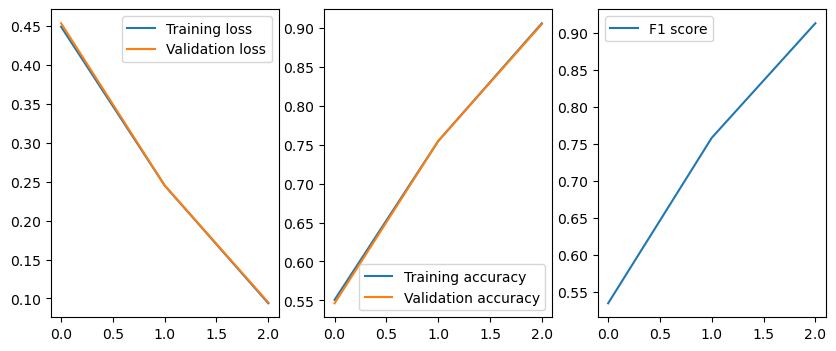

In [27]:
Perceptron_polynomial_experiment(xdata_train_select, ydata_train_select, 20, 4)

When degree = 1:
The mean of training loss = 0.4110055831072019, the mean of validation loss = 0.40970337793580985
The mean of training accuracy = 0.5889944168927981, the mean of validation accuracy = 0.5902966220641901
The mean of F1 Score for the system = 0.6318506613545672
When degree = 2:
The mean of training loss = 0.058045600573905995, the mean of validation loss = 0.05869280434172359
The mean of training accuracy = 0.941954399426094, the mean of validation accuracy = 0.9413071956582764
The mean of F1 Score for the system = 0.9466183196014107
When degree = 3:
The mean of training loss = 0.007524718505349178, the mean of validation loss = 0.00867876859736128
The mean of training accuracy = 0.9924752814946508, the mean of validation accuracy = 0.9913212314026387
The mean of F1 Score for the system = 0.9921575173851681


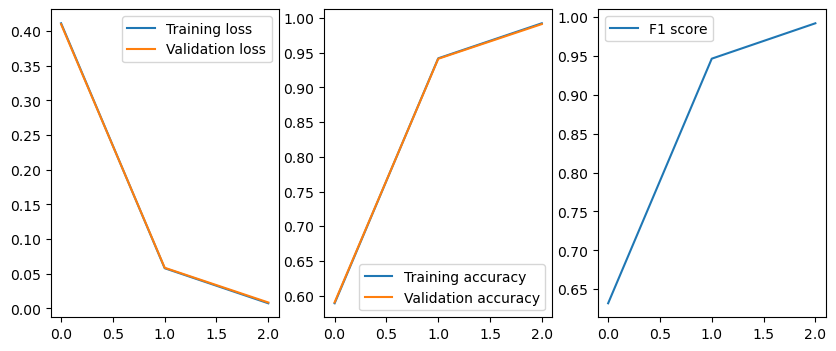

In [28]:
Perceptron_polynomial_experiment(xdata_train_select, ydata_train_select, 30, 4)

## Test
According the previous results, the best model is Perceptron with polynomial features using 30 original features and the highest degree is 3. Use this model to test on the test data and get the final result. 

In [29]:
def test_Perceptron_polynomial(xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select, k, max_degree):
    xdata_train = np.copy(xdata_train_select)
    ydata_train = np.copy(ydata_train_select)
    xdata_test = np.copy(xdata_test_select)
    ydata_test = np.copy(ydata_test_select)
    degree = max_degree
    
    # Reduce the feature numbers to k
    fs = SelectKBest(score_func=f_classif, k=k)
    
    # Apply feature selection
    xdata_train = fs.fit_transform(xdata_train, ydata_train)
    xdata_test = fs.transform(xdata_test)
    
    f1_score_history = []
    
    # Normalize dataset
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)   
    xdata_test = scaler.transform(xdata_test)

    N_train = len(xdata_train)
    N_test = len(xdata_test)
            
    # Transfer the features to polynomial
    poly = PolynomialFeatures(degree)
    xdata_poly_train = poly.fit_transform(xdata_train) 
    xdata_poly_test = poly.transform(xdata_test)

    reg = Perceptron(tol=1e-3).fit(xdata_poly_train, ydata_train)
            
    predict_train = reg.predict(xdata_poly_train) 
    predict_test = reg.predict(xdata_poly_test) 
            
    # Caluculate the mean squared error for training and validation data
    MSE_train = mean_squared_error(predict_train, ydata_train)
    MSE_test = mean_squared_error(predict_test, ydata_test)
            
    acc_train = np.sum(predict_train == ydata_train) / N_train
    acc_test = np.sum(predict_test == ydata_test) / N_test

    score = f1_score(predict_test, ydata_test)
        
        
    print(f"Degree = {degree}:")
    print(f"The training loss = {MSE_train}")        
    print(f"The testing loss = {MSE_test}")        
    print(f"The training accuracy = {acc_train}")
    print(f"The testing accuracy = {acc_test}")
    print(f"The F1 Score for the system on test data = {score}")
    
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(ydata_test, predict_test)
    plt.figure(figsize = (6, 6))
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title("Confusion Matrix for Perceptron System")

Degree = 3:
The training loss = 0.009591091980911388
The testing loss = 0.008296490366246384
The training accuracy = 0.9904089080190887
The testing accuracy = 0.9917035096337536
The F1 Score for the system on test data = 0.9926235077161991


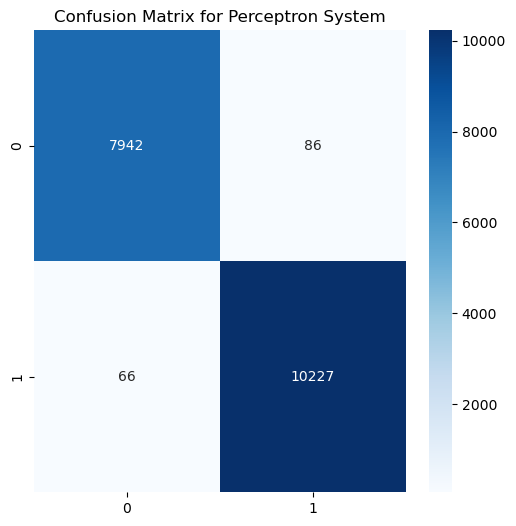

In [30]:
test_Perceptron_polynomial(xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select, 30, 3)